In [ ]:
!pip install ruptures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import tsfresh
import json
import datetime
from model import *
from cumsum import *
import ruptures as rpt

In [2]:
data = pd.read_excel('project_3_train+test.xlsx', index_col='Date')

In [3]:
train = data.iloc[:357]
test = data.iloc[357:]

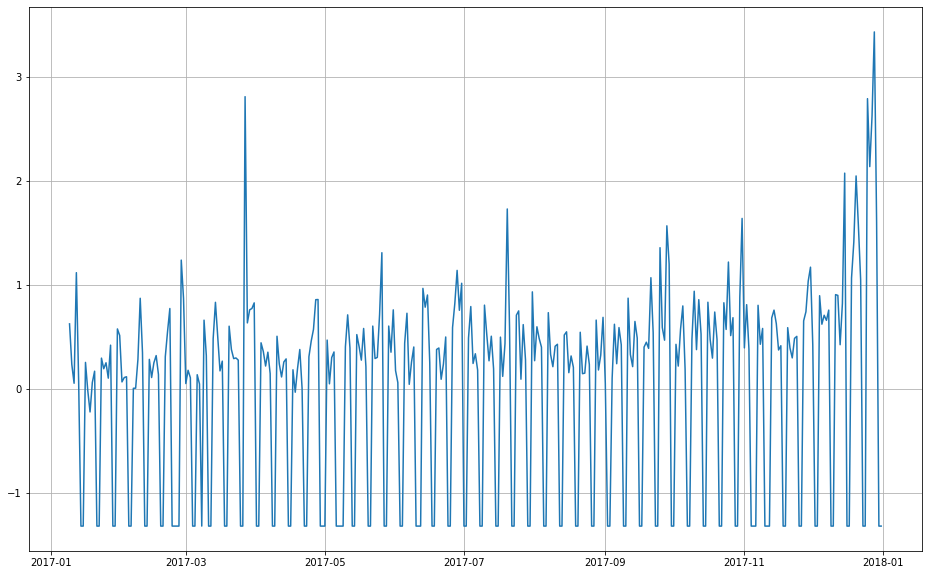

In [4]:
plt.figure(figsize=(16,10))
plt.plot(train)
plt.grid()
plt.show()

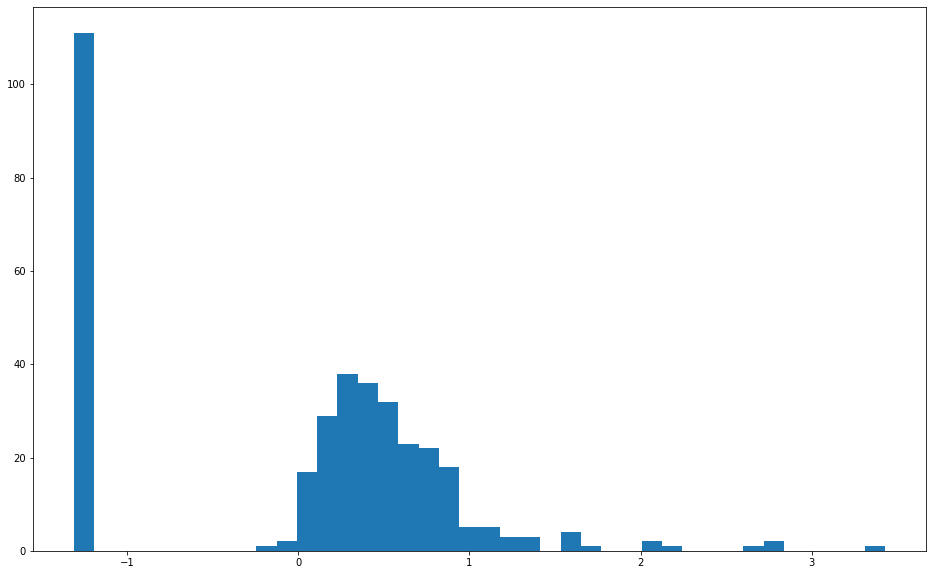

In [5]:
plt.figure(figsize=(16,10))
plt.hist(train.values, bins=40)
plt.show()

Столбец слева и сильнейшие колебания в отрицательные значения говорят о том, что что-то не так.

Если заглянуть в файл и календарь, то можно увидеть, что это одно и то же значение и оно стоит на выходном дне.

Поэтому удалим эти данные.

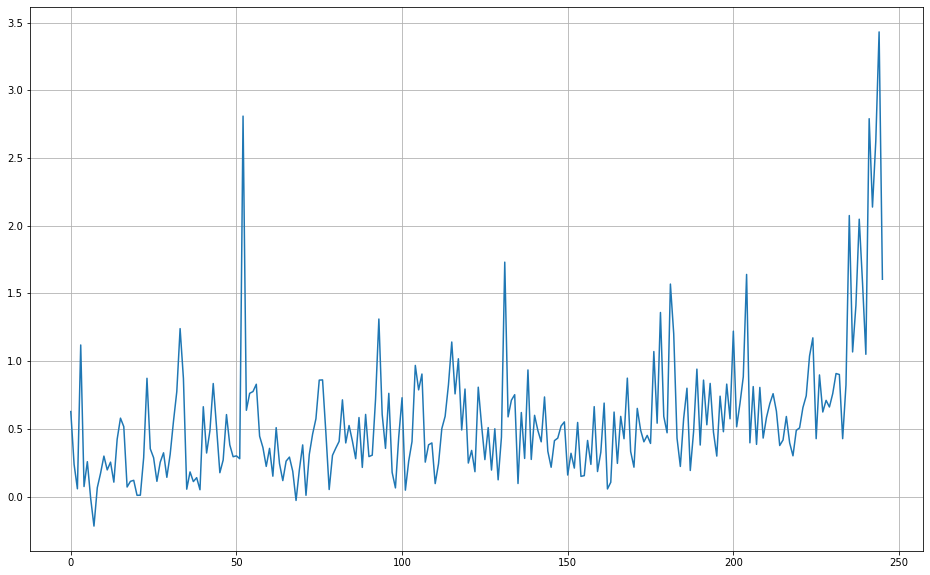

In [6]:
plt.figure(figsize=(16,10))
plt.plot(train['Target'].values[train['Target'] != train['Target'].values.min()])
plt.grid()
plt.show()

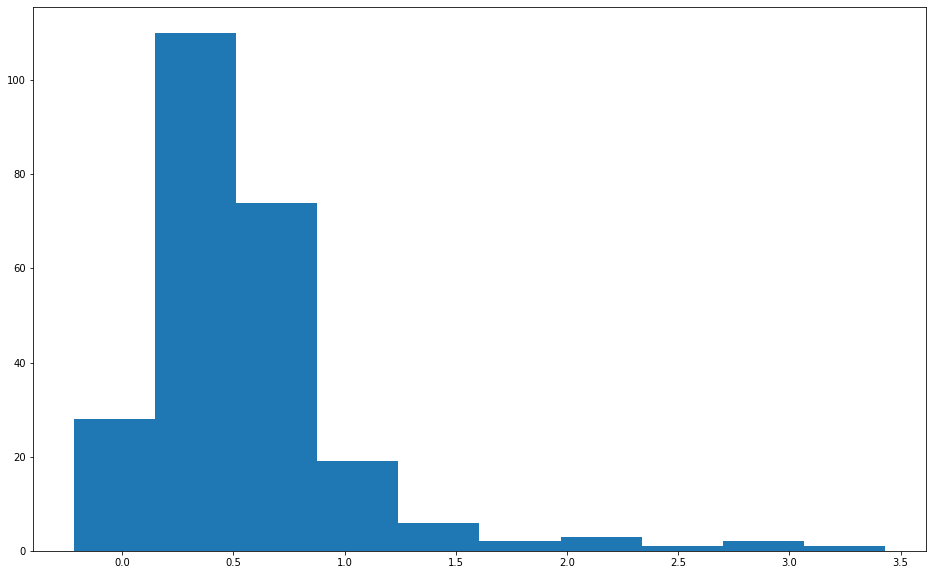

In [7]:
plt.figure(figsize=(16,10))
plt.hist(train['Target'].values[train['Target'] != train['Target'].values.min()])
plt.show()

Уже лучше. Переобозначим данные. Надо бы подумать, какое это распределение

In [8]:
data = data[data['Target'] != data['Target'].min()]
train = train[train['Target'] != train['Target'].min()]
test = test[test['Target'] != test['Target'].min()]

Посмотрим, как у нас со скользящим средним.

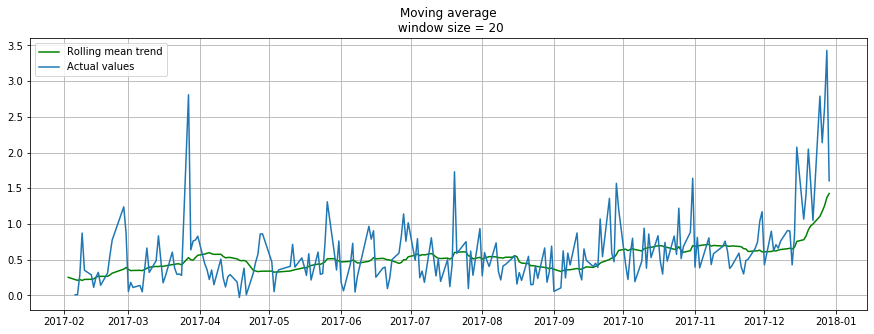

In [9]:
plotMovingAverage(train, train['Target'], 20)

В конце намечается какой-то тренд. Посмотрим на все данные.

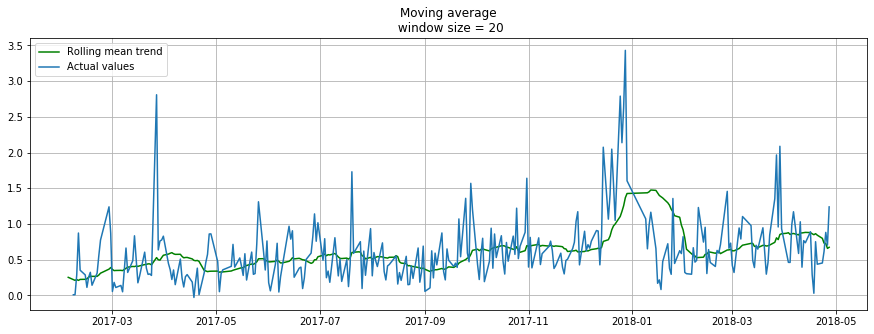

In [10]:
plotMovingAverage(data, data['Target'], 20)

Видим, что ликвидность нарастает к концу года, а в начале года она спадает и возвращается к прежней форме.

# Feature engineering

# Бизнес-логика

# Anomaly detection

Перепробуем все методы, чё нам

In [131]:
alg = rpt.Dynp(jump=5).fit(data['Target'].values)
my_bkpg_dynp = alg.predict(n_bkps=5)
my_bkpg_dynp

[30, 175, 235, 240, 245, 322]

In [132]:
alg = rpt.Pelt(jump=5).fit(data['Target'].values)
my_bkpg_pelt = alg.predict(pen=10)
my_bkpg_pelt

[235, 245, 322]

In [133]:
alg = rpt.Binseg(jump=5).fit(data['Target'].values)
my_bkpg_binseg = alg.predict(n_bkps=5)
my_bkpg_binseg

[175, 235, 240, 245, 250, 322]

In [134]:
alg = rpt.BottomUp(jump=5).fit(data['Target'].values)
my_bkpg_bot = alg.predict(n_bkps=5)
my_bkpg_bot

[50, 175, 235, 240, 245, 322]

In [148]:
alg = rpt.Window(jump=5).fit(data['Target'].values)
my_bkpg_win = alg.predict(n_bkps=5)
my_bkpg_win

[200, 322]

In [150]:
my_bkpg_cumsum = change_point_detection(data['Target'].values.tolist())
my_bkpg_cumsum

[0, 322]

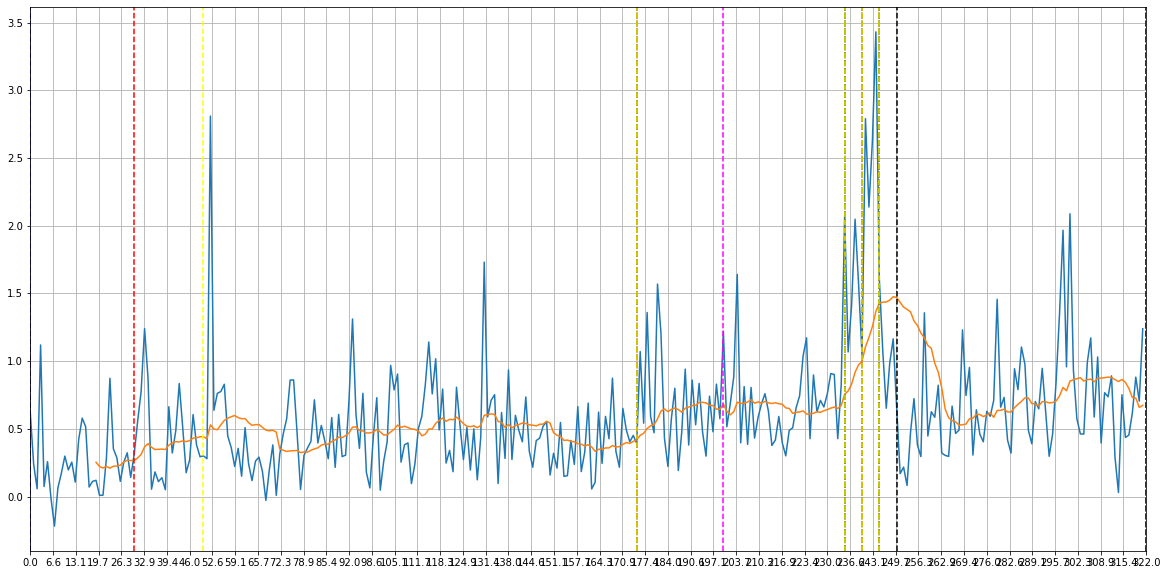

In [151]:
rolling_mean = data['Target'].rolling(window=20).mean().values
plt.figure(figsize=(20,10))
plt.plot(data['Target'].values)
plt.plot(rolling_mean)
plt.xticks(np.linspace(0,322))
plt.xlim((0,322))
for xc in my_bkpg_dynp:
    plt.axvline(x=xc,color='red', linestyle='--')
for xc in my_bkpg_pelt:
    plt.axvline(x=xc, color='green', linestyle='--')
for xc in my_bkpg_binseg:
    plt.axvline(x=xc, color='black', linestyle='--')
for xc in my_bkpg_bot:
    plt.axvline(x=xc, color='yellow', linestyle='--')
for xc in my_bkpg_win:
    plt.axvline(x=xc, color='magenta', linestyle='--')
for xc in my_bkpg_cumsum:
    plt.axvline(x=xc, color='blue', linestyle='--')
plt.grid()
plt.show()

# Feature selection